# Applications in Quantum Mechanics

In this module we will be using a Hartree-Fock implementation in Julia (Written by a Iowa State graduate student David Poole). We will use it to explore the energy differences between of the $H_2$ atom at with varying internuclear distances. 

## Plotting 
One last thing we need to learn how to do in Julia for this project is how to make plots. 

Plotting functionality is provided by the Plots.jl extension. 

Example: 


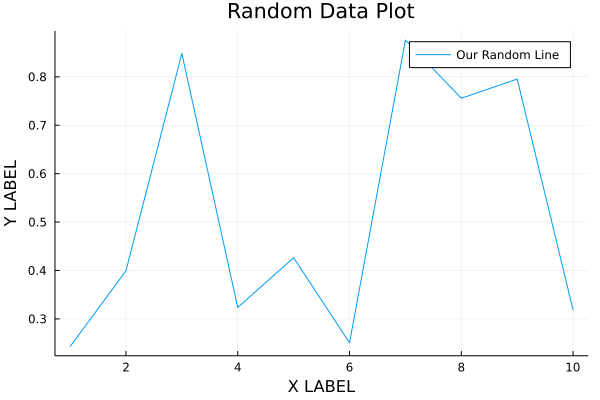

In [3]:
using Plots
random_plot = plot(rand(10,1), title = "Random Data Plot", label = "Our Random Line")
xlabel!("X LABEL")
ylabel!("Y LABEL")

Let's break down what we did above and make it a bit easier to see what is going on with predictable data. Lets imagine we are ploting part of the function f(x) = 2x. We will create two arrays and plot them, one being integers 1 to 10 representing our X data and another array [2, 4, 6 ... 20]





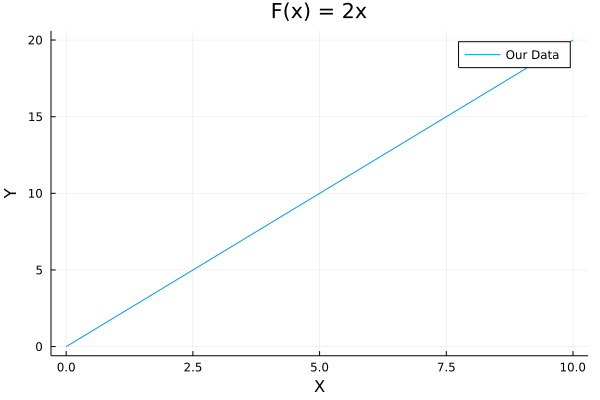

In [8]:
using Plots
X = [0,1,2,3,4,5,6,7,8,9,10]
Y = [0,2,4,6,8,10,12,14,16,18,20]
random_plot = plot(X,Y, title = "F(x) = 2x", label = "Our Data")
xlabel!("X")
ylabel!("Y")

We can also just plot a function with an input. 
- The first parameter is the function to plot. 
- The second 2 parameters are the range to plot.

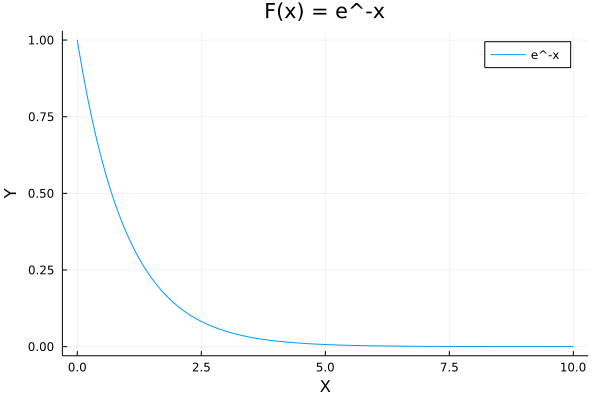

In [10]:
using Plots
f(x) = exp(-x)
random_plot = plot(f, 0,10, title = "F(x) = e^-x", label = "e^-x") 
xlabel!("X")
ylabel!("Y")

Multiple plots on the same image:

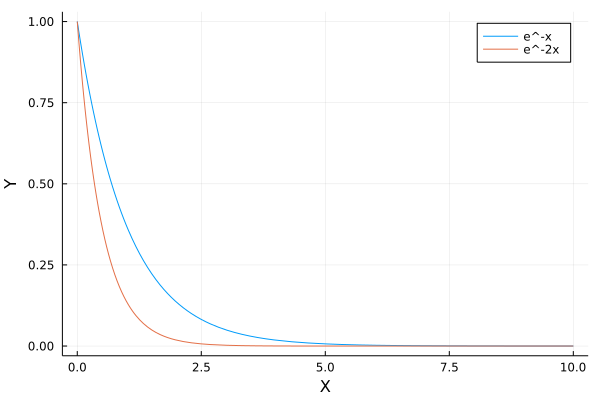

In [12]:
using Plots
f(x) = exp(-x)
f2(x) = exp(-2x)
random_plot = plot(f, 0,10, label = "e^-x") 
random_plot = plot!(f2, 0,10, label = "e^-2x") 

xlabel!("X")
ylabel!("Y")

Here is an example where we can save the plot to a file:

In [13]:
using Plots
random_plot = plot(rand(10,1), title = "Random Data Plot", label = "Our Random Line")
xlabel!("X LABEL")
ylabel!("Y LABEL")
savefig(random_plot, "randomplot")      # it will save it as a png file

## How to use JuliaChem 

At a high level, like most electronic structure theory codes, JuliaChem takes in an input file and then returns information about that system depending on what the input file tells it to do. 

Any use of JuliaChem starts with a call to JuliaChem.Initialize() and ends with a call to JuliaChem.Finalize()

``` Julia

JuliaChem.Initialize() 
# do your calls calculations
JuliaChem.Finalize()
```
### Input Files

The input files are JSON files using the [Molssi Quantum Chemistry Schema](https://molssi-qc-schema.readthedocs.io/en/latest/index.html#). The main things to worry about as someone just learning quantum chemistry are:
- the molecule information, 
  - atoms denoted by their atomic symbol "H", "O", "Li", etc.  
  - their positioning in XYZ coordinates. 
- the basis set you want to use. 
  - We will be using a minimal basis set: [STO-3G](https://en.wikipedia.org/wiki/STO-nG_basis_sets)

### Output 

The JuliaChem program returns a dictionary of values from the Hartree-Fock calculation. The value we are interested in is the Energy. We will plot the energy vs the internuclear distance to find the equilibrium distance (the one with the lowest energy).

### H2-Hartree-Fock Runner

I have built a small set of functions you can call that will abstract away all of the JuliaChem stuff. All you need to do is pass in a distance in atomic units and it will build the input file, run the calculation through JuliaChem and return the resulting energy. 

You can see an example of this in the final project [repository](https://github.com/j-hayes/chem-324-programming-tutorials-final-project) in the file main.jl

## Final Project 

Create a Julia Script that: 
- Uses JuliaChem to calculate the energies of the $H_2$ molecule at various internuclear distances
- Plots those energies
- Prints the minimum energy and internuclear distance (the equilibrium distance)

Note:
The energy will not be the exact value, it depends on the basis set, but it should be close to values you can find in textbooks/literature articles. So test out a few values or ranges of values and you can start to find where the minimum is. Then you can build your range for your plot. 

Advice:
- Don't start to close to 0, it will make your plot look weird because as $distance \rArr 0; E \rArr \infin $ 
- Don't go too far past the equilibrium value, it will just be a flat line. 
- Look at the textbook / literature plots out there, they will give you some guidance on good ranges to use. 